# dic={'bill of loading':0,'certificat of orgin':1,'inv':2,'invlist':3,'letter of credit':4,'booking confirmation':5,'packing list':6}

In [1]:
pwd

'/home/ai-machine/ICE-Ai/Data/maryam/CNN_ICEAI/cnn/supplychain/nlp'

In [2]:
 import pandas as pd

# Rading csv

In [4]:
df=pd.read_csv('imagetxt.csv')

In [5]:
# df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Unnamed: 0,image_name,label,text
0,0,PL SP200700230pdf_1.png,6,trw asiatic m sdn bhd no jalan astaka u seksye...
1,1,doc-center@satlglobalsharpcojp_20200807_154653...,6,x moo tambol bangsamak amphur soy fw o bangpa...
2,2,7976708_5770067pdf_1.png,6,delivery note no date ship to page tof nestle ...
3,3,packing list 5 Augustpdf_1.png,6,packing list be international marketing sdn bh...
4,4,7976708_5770067pdf_3.png,6,customs invoice no dt to page tof nestle singa...
...,...,...,...,...
445,445,SX200700016pdf_1.png,2,trw asiatic m sdn bhd t no jalan astaka u seks...
446,446,SX200700017pdf_1.png,2,trw asiatic m sdn bhd t no jalan astaka u seks...
447,447,SX200700017pdf_2.png,2,trw asiatic m sdn bhd t no jalan astaka u seks...
448,448,THXMY201319601_WITH BREAKDOWN (REV01)pdf_1.png,2,honda trading asia co ltd f i head office th f...


In [6]:
df.label.value_counts()

6    143
2    111
0     98
4     39
1     26
5     22
3     11
Name: label, dtype: int64

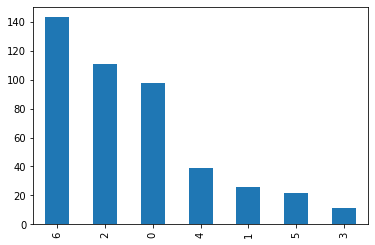

In [30]:
import matplotlib.pyplot as plt
df['label'].value_counts().sort_values(ascending=False).plot(kind='bar',y='count of label')

In [31]:
df

,image_name,label,text
0,PL SP200700230pdf_1.png,6,trw asiatic m sdn bhd no jalan astaka u seksye...
1,doc-center@satlglobalsharpcojp_20200807_154653...,6,x moo tambol bangsamak amphur soy fw o bangpa...
2,7976708_5770067pdf_1.png,6,delivery note no date ship to page tof nestle ...
3,packing list 5 Augustpdf_1.png,6,packing list be international marketing sdn bh...
4,7976708_5770067pdf_3.png,6,customs invoice no dt to page tof nestle singa...
...,...,...,...
445,SX200700016pdf_1.png,2,trw asiatic m sdn bhd t no jalan astaka u seks...
446,SX200700017pdf_1.png,2,trw asiatic m sdn bhd t no jalan astaka u seks...
447,SX200700017pdf_2.png,2,trw asiatic m sdn bhd t no jalan astaka u seks...
448,THXMY201319601_WITH BREAKDOWN (REV01)pdf_1.png,2,honda trading asia co ltd f i head office th f...


In [12]:
image_name=[]
label=[]
for item in df.iterrows():
    image_name.append(item[1]['image_name'])
    label.append(item[1]['label'])

# applying OCR for orginal images without augmentaion

In [8]:
def edit(text):
    filter_1=re.sub('[^a-zA-Z]'," ", text)
    filter_2=re.sub(' +', ' ',filter_1) 
    return(filter_2)##type of output

In [9]:
import re
import tesserocr
from tesserocr import PyTessBaseAPI

def all_ocr(path):
    
    api = PyTessBaseAPI(lang='eng',psm=tesserocr.PSM.SINGLE_BLOCK)
    api.SetImageFile(path)
#     api.GetUTF8Text=re.sub('[^a-zA-Z]', ' ')
    return api.GetUTF8Text()

In [11]:
import os
directory=r'/home/ai-machine/ICE-Ai/Data/maryam/CNN_ICEAI/cnn/supplychain/images/supply_chain_final_image'
result=[]
# for image in df.image_name:
for image in os.listdir(directory):
    
    text=all_ocr(os.path.join(directory,image))
    text=text.lower()  
    
#     text=text.splitlines()
#     print(text)
    result.append(edit(text) )


KeyboardInterrupt: 

In [20]:
len(result)

441

In [ ]:
df['text']=

In [13]:
df.drop(columns=['label','image_name'],inplace=True)
df

,Unnamed: 0,text
0,0,trw asiatic m sdn bhd no jalan astaka u seksye...
1,1,x moo tambol bangsamak amphur soy fw o bangpa...
2,2,delivery note no date ship to page tof nestle ...
3,3,packing list be international marketing sdn bh...
4,4,customs invoice no dt to page tof nestle singa...
...,...,...
445,445,trw asiatic m sdn bhd t no jalan astaka u seks...
446,446,trw asiatic m sdn bhd t no jalan astaka u seks...
447,447,trw asiatic m sdn bhd t no jalan astaka u seks...
448,448,honda trading asia co ltd f i head office th f...


In [14]:
##Creating a list of stop words and adding custom stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ['eee','good','number','malaysia','kuala lampur','china','ee','asean','trade good agreement',
             'place date signature','code','cee',]
stop_words = stop_words.union(new_words)

In [15]:
df_1=df

In [16]:
df_1

,Unnamed: 0,text
0,0,trw asiatic m sdn bhd no jalan astaka u seksye...
1,1,x moo tambol bangsamak amphur soy fw o bangpa...
2,2,delivery note no date ship to page tof nestle ...
3,3,packing list be international marketing sdn bh...
4,4,customs invoice no dt to page tof nestle singa...
...,...,...
445,445,trw asiatic m sdn bhd t no jalan astaka u seks...
446,446,trw asiatic m sdn bhd t no jalan astaka u seks...
447,447,trw asiatic m sdn bhd t no jalan astaka u seks...
448,448,honda trading asia co ltd f i head office th f...


# Text Cleaning

In [17]:
corpus = []
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


for i in range(0, len(df_1)):
#     try : 
        
    #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', df_1['text'][i])

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text=re.sub("&lt;'/?.*?&gt;"," &lt;&gt; ",text)

        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)

        ##Convert to list from string
        text = text.split()

        ##Stemming
        ps=PorterStemmer()
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_words] 
        text = " ".join(text)
        corpus.append(text)
#     except:
#         print( 'noting ')

In [18]:
corpus

['trw asiatic sdn bhd jalan astaka u seksyen u bukit jelutong industrial park shah alam selangor darul ehsan tel fax packing list ship yuen thong co pte ltd invoice x genting road singapore packing list sp consign place loading yuen thong co pte ltd final destination singapore veerasamy rd delivery mode truck singapore shipment term ddu sgp marking ene sein rr alone kg kg bwc wheel cyl bwk wheel cyl bwk wheel cyl bwk wheel cylinder bwk wheel cylinder bwn b w cyl pjh c cyl pmd brake master cylinder pmf b cyl pmh master cylinder pnb c cyl bwc wheel cyl pallet size cm x cm x cm df brake disc df brake disc pallet size cm x cm x cm db brake drum db brake disc df brake disc pallet size cm x cm x cm df brake disc df brake disc df brake disc df x brake disc df brake disc df brake disc df brake disc pallet size cm x cm x cm bwc wheel cyl bwn wheel cyl df brake disc df brake disc jtc control arm pallet size cm x cm x cm grand total tse',
 'x moo tambol bangsamak amphur soy fw bangpakong chachoen

In [19]:
len(corpus)

450

# removing words with 3 characters

In [20]:
import re
corpus_1=[]
pattern=r'\b\w{1,3}\b'
for text in corpus:
    

#     print(type(text))
    text=re.sub(pattern,'',text)
    corpus_1.append(text)



In [21]:
corpus_1

[' asiatic   jalan astaka  seksyen  bukit jelutong industrial park shah alam selangor darul ehsan   packing list ship yuen thong    invoice  genting road singapore packing list  consign place loading yuen thong    final destination singapore veerasamy  delivery mode truck singapore shipment term   marking  sein  alone    wheel   wheel   wheel   wheel cylinder  wheel cylinder         brake master cylinder     master cylinder     wheel  pallet size       brake disc  brake disc pallet size       brake drum  brake disc  brake disc pallet size       brake disc  brake disc  brake disc   brake disc  brake disc  brake disc  brake disc pallet size       wheel   wheel   brake disc  brake disc  control  pallet size      grand total ',
 '  tambol bangsamak amphur   bangpakong chachoengsao province  thailand  auto sharp appliance thailand limited  invoiceno  attachment sree mark  description good quantity  price amount  nave total carton  sharp appliance  mmited        kumaro deputy gdirector',
 'd

# Drawing wordcloud N-gram,B-gram..

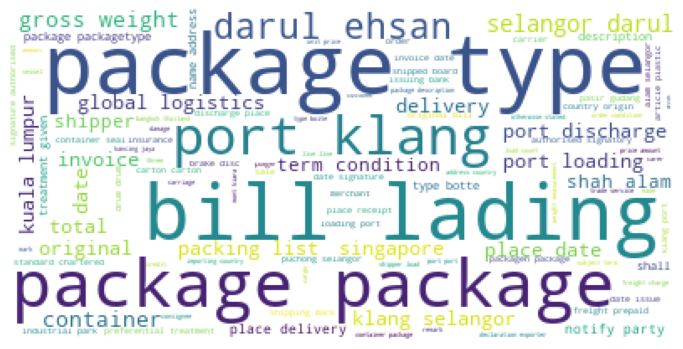

In [44]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# % matplotlib inline
wordcloud = WordCloud(
                          background_color='white',      
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=1
                         ).generate(str(corpus_1))
print(wordcloud)
fig = plt.figure(1,figsize=(12, 12))
# plt.title('word cloud of Certificate of orgin')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'package'),
 Text(0, 0, 'port'),
 Text(0, 0, 'date'),
 Text(0, 0, 'good'),
 Text(0, 0, 'total'),
 Text(0, 0, 'container'),
 Text(0, 0, 'type'),
 Text(0, 0, 'weight'),
 Text(0, 0, 'jalan'),
 Text(0, 0, 'place'),
 Text(0, 0, 'klang'),
 Text(0, 0, 'order'),
 Text(0, 0, 'invoice'),
 Text(0, 0, 'lading'),
 Text(0, 0, 'bill'),
 Text(0, 0, 'bank'),
 Text(0, 0, 'selangor'),
 Text(0, 0, 'singapore'),
 Text(0, 0, 'delivery'),
 Text(0, 0, 'carrier')]

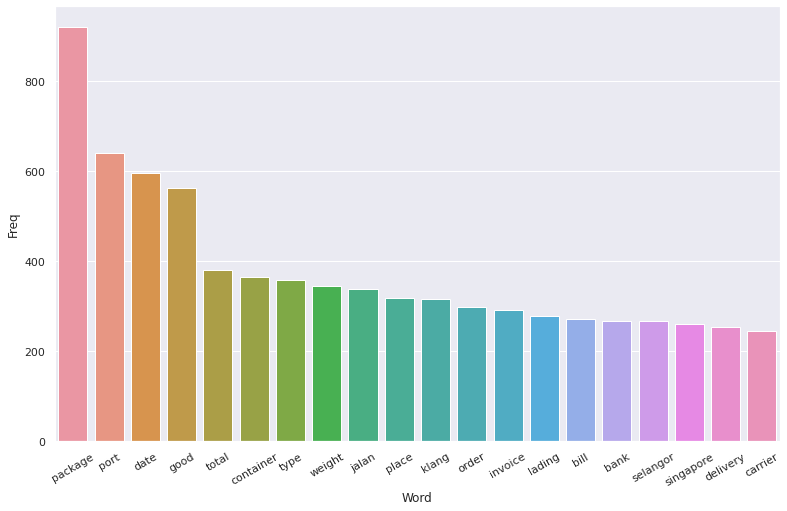

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus_1)
    bag_of_words = vec.transform(corpus_1)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

             Bi-gram  Freq
0            sdn bhd   468
1              kg kg   271
2       package type   246
3            tel fax   218
4        bill lading   211
5         port klang   206
6    package package   185
7             co ltd   165
8        darul ehsan   152
9     selangor darul   149
10           pte ltd   128
11      gross weight   127
12         weight kg   122
13      packing list   104
14    port discharge   101
15  description good    94
16  global logistics    94
17      kuala lumpur    91
18    klang selangor    82
19      port loading    82


[Text(0, 0, 'sdn bhd'),
 Text(0, 0, 'kg kg'),
 Text(0, 0, 'package type'),
 Text(0, 0, 'tel fax'),
 Text(0, 0, 'bill lading'),
 Text(0, 0, 'port klang'),
 Text(0, 0, 'package package'),
 Text(0, 0, 'co ltd'),
 Text(0, 0, 'darul ehsan'),
 Text(0, 0, 'selangor darul'),
 Text(0, 0, 'pte ltd'),
 Text(0, 0, 'gross weight'),
 Text(0, 0, 'weight kg'),
 Text(0, 0, 'packing list'),
 Text(0, 0, 'port discharge'),
 Text(0, 0, 'description good'),
 Text(0, 0, 'global logistics'),
 Text(0, 0, 'kuala lumpur'),
 Text(0, 0, 'klang selangor'),
 Text(0, 0, 'port loading')]

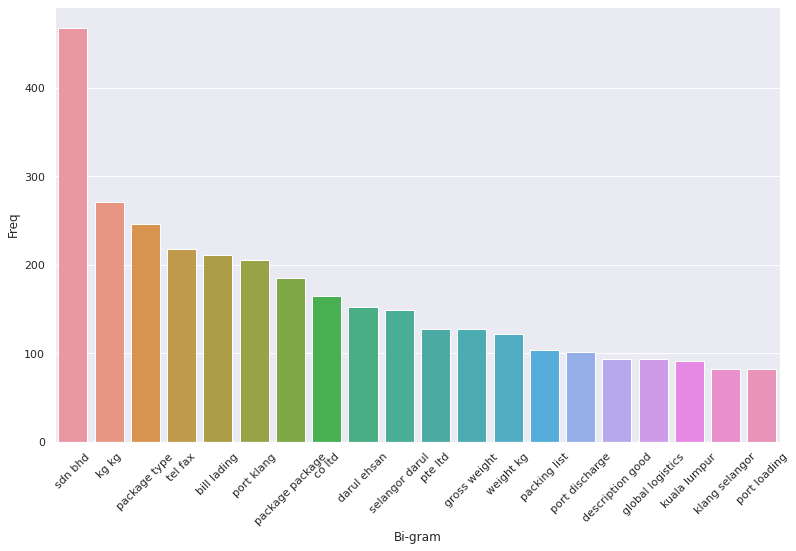

In [47]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus_1, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus_1)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                          Tri-gram  Freq
0             selangor darul ehsan   143
1             package package type   142
2              fm global logistics    77
3               package type botte    61
4                       kg kg drum    60
5     preferential treatment given    58
6             global logistics sdn    51
7            packagen package type    51
8             klang selangor darul    50
9                  gross weight kg    44
10            place date signature    44
11              shah alam selangor    43
12                   df brake disc    43
13            original bill lading    42
14                 port klang port    41
15  signature authorised signatory    41
16            port discharge place    40
17                kilogram wth pkg    40
18               port loading port    39
19                        kg kg kg    39


[Text(0, 0, 'selangor darul ehsan'),
 Text(0, 0, 'package package type'),
 Text(0, 0, 'fm global logistics'),
 Text(0, 0, 'package type botte'),
 Text(0, 0, 'kg kg drum'),
 Text(0, 0, 'preferential treatment given'),
 Text(0, 0, 'global logistics sdn'),
 Text(0, 0, 'packagen package type'),
 Text(0, 0, 'klang selangor darul'),
 Text(0, 0, 'gross weight kg'),
 Text(0, 0, 'place date signature'),
 Text(0, 0, 'shah alam selangor'),
 Text(0, 0, 'df brake disc'),
 Text(0, 0, 'original bill lading'),
 Text(0, 0, 'port klang port'),
 Text(0, 0, 'signature authorised signatory'),
 Text(0, 0, 'port discharge place'),
 Text(0, 0, 'kilogram wth pkg'),
 Text(0, 0, 'port loading port'),
 Text(0, 0, 'kg kg kg')]

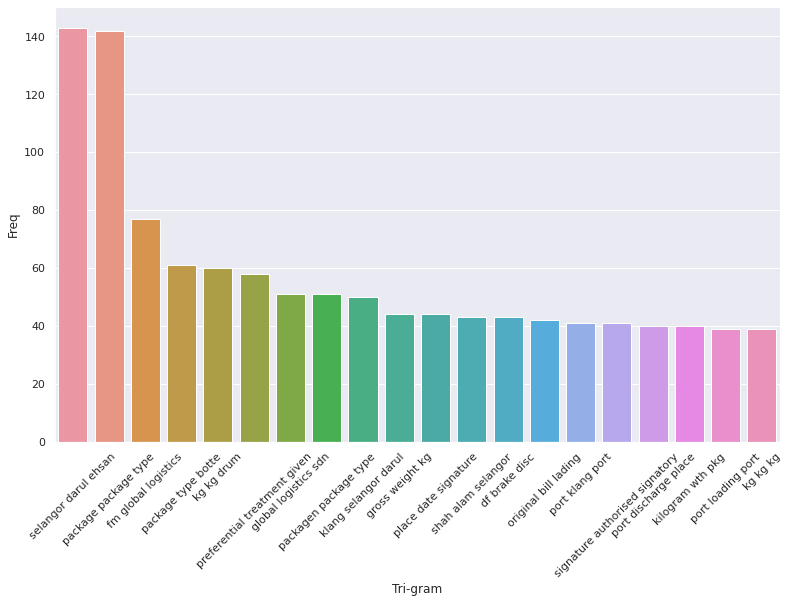

In [48]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

# new dataframe with cleaned text[corpus_1] , label, image name

In [22]:
df_train_nlp=pd.DataFrame({'image_name':image_name,'text':corpus_1,'label':label})
df_train_nlp

,image_name,text,label
0,PL SP200700230pdf_1.png,asiatic jalan astaka seksyen bukit jeluto...,6
1,doc-center@satlglobalsharpcojp_20200807_154653...,tambol bangsamak amphur bangpakong chachoe...,6
2,7976708_5770067pdf_1.png,delivery note date ship page nestle singapore...,6
3,packing list 5 Augustpdf_1.png,packing list international marketing link j...,6
4,7976708_5770067pdf_3.png,custom invoice page nestle singapore inter...,6
...,...,...,...
445,SX200700016pdf_1.png,asiatic jalan astaka seksyen bukit jeluto...,2
446,SX200700017pdf_1.png,asiatic jalan astaka seksyen bukit jeluto...,2
447,SX200700017pdf_2.png,asiatic jalan astaka seksyen bukit jeluto...,2
448,THXMY201319601_WITH BREAKDOWN (REV01)pdf_1.png,honda trading asia head office floor sath...,2


In [289]:
# df_train_nlp=df_train_nlp[(df_train_nlp['label']==2) | (df_train_nlp['label']==6) | (df_train_nlp['label']==0)]

In [23]:
df_train_nlp['label'].value_counts()

6    143
2    111
0     98
4     39
1     26
5     22
3     11
Name: label, dtype: int64

In [24]:
corpus = []
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


for i in range(0, len(df_train_nlp)):
#     try : 
        
    #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', df_1['text'][i])

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text=re.sub("&lt;'/?.*?&gt;"," &lt;&gt; ",text)

        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)

        ##Convert to list from string
        text = text.split()

        ##Stemming
        ps=PorterStemmer()
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_words] 
        text = " ".join(text)
        corpus.append(text)
#     except:
#         print( 'noting ')

# CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1, 3),max_df=500,min_df=10)
X=cv.fit_transform(corpus).toarray()


# TfidfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_df=120,min_df=20)
X = vectorizer.fit_transform(corpus).toarray()

In [27]:
y=df_train_nlp.iloc[:, -1].values
y.shape

(450,)

In [28]:
X.shape

(450, 780)

# Splitting dataset to train_set and test_set

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# Stochastic Gradient Descent Classifier

In [55]:
sgd_clf = SGDClassifier(loss='huber',class_weight='balanced')
sgf_clf_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5)
print(sgf_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_scores.mean(), sgf_clf_scores.std() * 2))


[0.86111111 0.86111111 0.79166667 0.88888889 0.83333333]
Accuracy: 0.85 (+/- 0.07)


In [63]:
sgd_clf = SGDClassifier(random_state=123,loss='log')
sgd_clf.fit( X_train, y_train)

SGDClassifier(loss='log', random_state=123)

In [67]:
b=sgd_clf.decision_function(X_test)


In [68]:
b[2]

array([-3.53130779,  3.76654561, -5.18326869, -5.85880154, -6.60830056,
       -6.52171882, -4.44126934])

In [65]:
a=sgd_clf.predict_log_proba(X_test)

In [66]:
a[2]

array([-3.58846045, -0.05117448, -5.21716879, -5.88995826, -6.6379549 ,
       -6.55149501, -4.48128759])

In [40]:
sgf_clf_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
print(confusion_matrix(y_train, sgf_clf_pred))

[[66  0  1  4  0  2  3]
 [ 0 19  0  0  0  0  0]
 [ 2  0 68  0  0  0 21]
 [ 3  0  1  5  0  0  0]
 [ 0  0  1  0 32  0  0]
 [ 4  0  0  0  0 12  0]
 [ 4  0 16  0  0  0 96]]


In [41]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['hinge', 'log', 'squared_hinge'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=sgd_clf, param_grid=grid, cv=5)
search.fit(X_train, y_train)
search.best_params_


{'early_stopping': False,
 'fit_intercept': True,
 'loss': 'log',
 'penalty': 'l1'}

In [42]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, X_train, y_train, cv=5)
print(grid_sgd_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_sgd_clf_scores.mean(), grid_sgd_clf_scores.std() * 2))

[0.83333333 0.83333333 0.80555556 0.95833333 0.84722222]
Accuracy: 0.86 (+/- 0.11)


# Logistic regression

In [302]:
from sklearn.linear_model import LogisticRegression
lgregression = LogisticRegression(random_state = 0)
lgregression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [303]:
X_test.shape

(90, 780)

In [304]:
y_pred = lgregression.predict(X_test)


In [305]:
y_test.shape

(90,)

In [306]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0  1  0  0  0  3]
 [ 0  7  0  0  0  0  0]
 [ 0  0 14  0  0  0  6]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 1  0  0  0  0  3  0]
 [ 0  0  4  0  0  0 27]]


0.8333333333333334

# SVM

In [307]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
prediction_classifier=classifier.predict(X_test)

In [308]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction_classifier)
print(cm)
accuracy_score(y_test, prediction_classifier)

[[17  0  1  0  0  0  2]
 [ 0  7  0  0  0  0  0]
 [ 0  0 15  0  0  0  5]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 1  0  0  0  0  3  0]
 [ 0  0  3  0  0  0 28]]


0.8666666666666667

# svc

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    LogisticRegression(random_state=0),
    SGDClassifier(random_state=123),
    SVC(kernel = 'rbf', random_state = 0),
    naive_bayes.MultinomialNB()
]
CV = 7
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


In [341]:
from sklearn.svm import LinearSVC
lin_svc=LinearSVC()
lin_svc.fit(X_train,y_train)


LinearSVC()

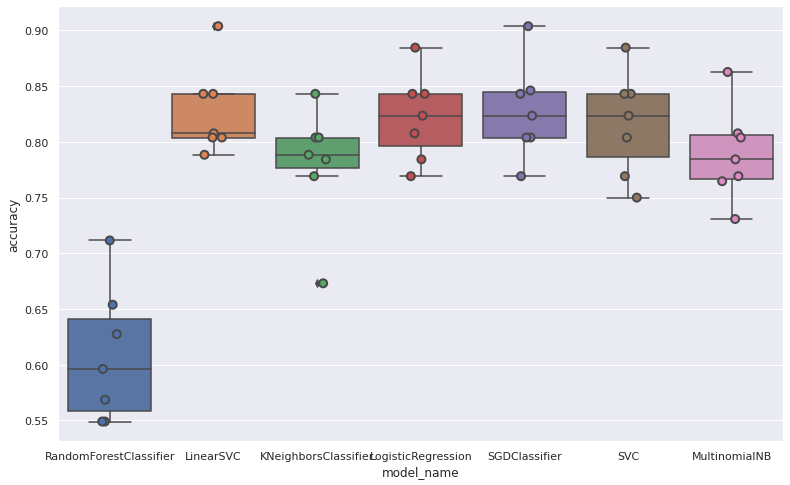

In [331]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [332]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.596154
1,RandomForestClassifier,1,0.711538
2,RandomForestClassifier,2,0.653846
3,RandomForestClassifier,3,0.568627
4,RandomForestClassifier,4,0.549020
5,RandomForestClassifier,5,0.627451
6,RandomForestClassifier,6,0.549020
7,LinearSVC,0,0.788462
8,LinearSVC,1,0.903846
9,LinearSVC,2,0.807692


# KNN

In [318]:

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)
prediction_KNN=KNN.predict(X_test)

In [319]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction_KNN)
print(cm)
accuracy_score(y_test, prediction_classifier)

[[15  0  1  0  1  2  1]
 [ 0  7  0  0  0  0  0]
 [ 1  0 11  0  0  0  8]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 1  0  0  0  0  3  0]
 [ 2  0  8  0  0  0 21]]


0.8666666666666667

# NAIVE BAYES

In [309]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [310]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score  ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score   81.11111111111111


In [311]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions_NB)
print(cm)
accuracy_score(y_test, predictions_NB)

[[15  0  1  0  0  0  4]
 [ 0  7  0  0  0  0  0]
 [ 0  0 12  0  0  0  8]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 1  0  0  0  0  3  0]
 [ 0  0  2  0  0  0 29]]


0.8111111111111111

In [312]:
import pickle
with open('Naive_pickle','wb') as f:
    
    pickle.dump(Naive,f)

In [70]:
import pickle
with open('svm_pickle','wb') as f:
    
    pickle.dump(classifier,f)

In [71]:
import pickle
with open('logestic_regression_pickle','wb') as f:
    
    pickle.dump(lgregression,f)

In [72]:
import pickle
with open('count_vector_object_pickle','wb') as f:
    
    pickle.dump(cv,f)

In [334]:
import pickle
with open('tfidf_pickle','wb') as f:
    
    pickle.dump(vectorizer,f)

In [45]:
import pickle
with open('STOCHASTIC_GRADIENT_pickle','wb') as f:
    
    pickle.dump(sgd_clf ,f)

In [342]:
import pickle
with open('linear_svc_pickle','wb') as f:
    
    pickle.dump(lin_svc ,f)

# Saving model[naibe bayes,svm,logestic regression]